In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue

In [2]:
nrows = 100
ncols = 6

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.normal(loc=100, scale=20, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])

In [3]:
series.blue.statistics.std_within()

StdWithin(nrows=100, ncols=1, how=amr, axis=0, std=15.8225)

In [4]:
series.blue.statistics.std_within(how='amr')

StdWithin(nrows=100, ncols=1, how=amr, axis=0, std=15.8225)

In [5]:
series.blue.statistics.std_within(how='mmr')

StdWithin(nrows=100, ncols=1, how=mmr, axis=0, std=12.0421)

In [6]:
series.blue.statistics.std_within(how='mssd')

StdWithin(nrows=100, ncols=1, how=mssd, axis=0, std=15.8964)

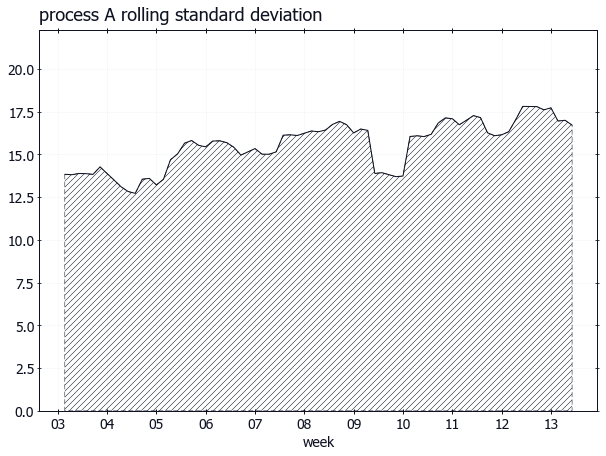

In [17]:
series.blue.statistics.rolling_std(window=28).plot()

In [8]:
# break the series
breaks = series.shape[0] // 5
loc = list(np.arange(0+breaks, series.shape[0], breaks))
series.iloc[loc] = np.nan

# break the frame
breaks = frame.shape[0] // 5
loc = list(np.arange(0+breaks, frame.shape[0], breaks))
for x in range(frame.shape[1]):
    frame.iloc[loc,x] = np.nan

In [9]:
series.blue.statistics.std_within()

StdWithin(nrows=100, ncols=1, how=amr, axis=0, std=15.7517)

In [10]:
series.blue.statistics.std_within(how='amr')

StdWithin(nrows=100, ncols=1, how=amr, axis=0, std=15.7517)

In [11]:
series.blue.statistics.std_within(how='mmr')

StdWithin(nrows=100, ncols=1, how=mmr, axis=0, std=11.9107)

In [12]:
series.blue.statistics.std_within(how='mssd')

StdWithin(nrows=100, ncols=1, how=mssd, axis=0, std=15.2232)